Look into twitter text data to predict if the given text has positive or negative sentiment towards a particular brand. The dataset includes twitter text related to Apple and Google products with user sentiment ranked between ‘positive’, ‘negative’, ‘neutral’ and ‘no_idea’, sentiments. Create a simpleRNN or LSTM based classifiers to classify tweets into the four classes. You can avoid ‘emotion_in_tweet_is_directed_at’ column.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read Dataset
tweet_product=pd.read_csv('/content/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

Data Preprocessing

In [ ]:
tweet_product

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [ ]:
tweet_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [ ]:
tweet_product.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [ ]:
tweet_product.shape

(9093, 3)

In [ ]:
tweet_product.isnull().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


In [ ]:
#Drop the column 'emotion_in_tweet_is_directed_at'
tweet_product.drop('emotion_in_tweet_is_directed_at', axis=1, inplace=True)

In [ ]:
tweet_product['tweet_text'].fillna(tweet_product['tweet_text'].mode()[0],inplace=True)

/tmp/ipython-input-49-1891265331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweet_product['tweet_text'].fillna(tweet_product['tweet_text'].mode()[0],inplace=True)


In [ ]:
tweet_product.isnull().sum()


,0
tweet_text,0
is_there_an_emotion_directed_at_a_brand_or_product,0


In [ ]:
#Value Counts of column
tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
No emotion toward brand or product,5389
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [ ]:
#Mapping
size_mapping={'Positive emotion':'positive',
              'Negative emotion':'negative',
              'No emotion toward brand or product':'no_idea',
              "I can't tell":'neutral',
              }
#apply this mapping
tweet_product['is_there_an_emotion_directed_at_a_brand_or_product']=tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'].map(size_mapping)

In [ ]:
#After mapping value counts
tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
no_idea,5389
positive,2978
negative,570
neutral,156


In [ ]:
#checking out the no_idea emotion from dataset
tweet_product[tweet_product['is_there_an_emotion_directed_at_a_brand_or_product']=='no_idea'].head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,no_idea
6,RT @mention Marissa Mayer: Google Will Connect...,no_idea
16,Holler Gram for iPad on the iTunes App Store -...,no_idea
32,"Attn: All #SXSW frineds, @mention Register fo...",no_idea
33,Anyone at #sxsw want to sell their old iPad?,no_idea


In [ ]:
#checking out the positive emotion from dataset
tweet_product[tweet_product['is_there_an_emotion_directed_at_a_brand_or_product']=='positive'].head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,positive
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive
7,"#SXSW is just starting, #CTIA is around the co...",positive
8,Beautifully smart and simple idea RT @madebyma...,positive


In [ ]:
#checking out the negative emotion from dataset
tweet_product[tweet_product['is_there_an_emotion_directed_at_a_brand_or_product']=='negative'].head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative
3,@sxsw I hope this year's festival isn't as cra...,negative
17,I just noticed DST is coming this weekend. How...,negative
38,@mention - False Alarm: Google Circles Not Co...,negative
64,Again? RT @mention Line at the Apple store is ...,negative


In [ ]:
#checking out the neutral emotion from dataset
tweet_product[tweet_product['is_there_an_emotion_directed_at_a_brand_or_product']=='neutral'].head(5)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
90,Thanks to @mention for publishing the news of ...,neutral
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,neutral
237,Just what America needs. RT @mention Google to...,neutral
341,The queue at the Apple Store in Austin is FOUR...,neutral
368,Hope it's better than wave RT @mention Buzz is...,neutral


Data Visualisation

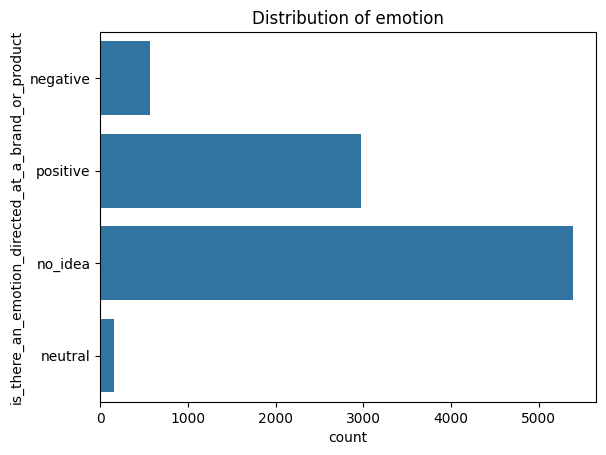

In [ ]:
sns.countplot(tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'])
plt.title('Distribution of emotion')

plt.show()

Text Preprocessing

In [ ]:
import nltk
import re
import html
import unicodedata

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('punkt',force=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
# Manually define punctuation characters
def remove_punctuation(text):
    punct = [ '#', '@','http','www']
    return ''.join([char for char in text if char not in punct])

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = remove_punctuation(text)

    # Tokenize (basic whitespace split)
    tokens = text.split()

    # Remove mentions, hashtags, URLs
    tokens = [word for word in tokens if not word.startswith('@') and not word.startswith('#') and not word.startswith('http') and not word.startswith('www')]

    # Basic stopwords
    stop_words = set(stopwords.words('english'))  # Needs nltk.download('stopwords') once
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return " ".join(tokens)

In [ ]:
# Apply to dataset
tweet_product['cleaned'] = tweet_product['tweet_text'].apply(preprocess_text)

In [ ]:
# Remove empty or whitespace-only rows
tweet_product= tweet_product[tweet_product['cleaned'].str.strip() != '']

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweet_product['label'] = le.fit_transform(tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'])

X = tweet_product['cleaned']
y = tweet_product['label']


In [ ]:
tweet_product['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
no_idea,5389
positive,2978
negative,570
neutral,156


In [ ]:
for i,label in enumerate(le.classes_):
    print(i,":",label)

0 : negative
1 : neutral
2 : no_idea
3 : positive


In [ ]:
print(le.classes_)

['negative' 'neutral' 'no_idea' 'positive']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_len),
    SimpleRNN(128, return_sequences=True),   # First RNN layer returns sequence
    Dropout(0.3),
    SimpleRNN(64),                           # Second RNN layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')           # Final output layer for 4 classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train_pad, y_train, batch_size=256, epochs=25, validation_split=0.1, class_weight=class_weights)


Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.8657 - loss: 0.2533 - val_accuracy: 0.4882 - val_loss: 1.4596
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.8788 - loss: 0.2569 - val_accuracy: 0.5181 - val_loss: 1.5728
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.8819 - loss: 0.2500 - val_accuracy: 0.5542 - val_loss: 1.3871
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.8790 - loss: 0.2283 - val_accuracy: 0.5071 - val_loss: 1.5965
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.8691 - loss: 0.2361 - val_accuracy: 0.5181 - val_loss: 1.4708
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.8684 - loss: 0.3161 - val_accuracy: 0.3595 - val_loss: 2.0038
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 0.7926 - loss: 0.4496 - val_accuracy: 0.5228 - val_loss: 1.4541
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.8719 - loss: 0.2440 - val_accuracy:

In [86]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4955 - loss: 1.8454
Test Accuracy: 0.49266862869262695


In [87]:
#LSTM
from tensorflow.keras.layers import LSTM

model1 = Sequential()
model1.add(Embedding(input_dim = 20000,output_dim = 100,input_shape=(300,)))
model1.add(LSTM(50,return_sequences = True))
model1.add(LSTM(128,dropout = 0.2))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_len),
    LSTM(128, dropout=0.2),
    Dense(4, activation='softmax')
])

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model1.fit(X_train_pad, y_train, batch_size=256, epochs=20, validation_split=0.1, class_weight=class_weights)

#model1.fit(X_train_pad, y_train, batch_size=256, epochs=10, validation_split=0.1)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1278 - loss: 1.4002 - val_accuracy: 0.0110 - val_loss: 1.4040
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 575ms/step - accuracy: 0.0174 - loss: 1.3676 - val_accuracy: 0.0110 - val_loss: 1.4031
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 531ms/step - accuracy: 0.0194 - loss: 1.4260 - val_accuracy: 0.0110 - val_loss: 1.3943
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 564ms/step - accuracy: 0.0238 - loss: 1.4821 - val_accuracy: 0.0110 - val_loss: 1.3912
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 607ms/step - accuracy: 0.1994 - loss: 1.3717 - val_accuracy: 0.0659 - val_loss: 1.3925
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - accuracy: 0.0668 - loss: 1.3762 - val_accuracy: 0.0659 - val_loss: 1.3915
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 605ms/step - accuracy: 0.0308 - loss: 1.4340 - val_accuracy: 0.0110 - val_loss: 1.3985
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 582ms/step - accuracy: 0.0206 - loss: 1.4324 - val_accurac

In [90]:
loss, accuracy = model1.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.0203 - loss: 1.3997
Test Accuracy: 0.015762463212013245


In [ ]:

def predict_sentiment(text, model=model):  
    cleaned_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post')
    pred = model.predict(padded)
    class_idx = np.argmax(pred, axis=1)[0]
    sentiment = le.inverse_transform([class_idx])[0]
    return sentiment

In [123]:
#Test prediction: negative
pred_tweet = "diller says google tv run playstation essentia..."
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted} 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Tweet: "diller says google tv run playstation essentia..."
Prediction: negative 😞


In [122]:
#Test prediction:positive
pred_tweet = "essentials pocket extra"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted} 😊")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Tweet: "essentials pocket extra"
Prediction: positive 😊


In [121]:
#test prediction:no_idea
pred_tweet = "know plane sxsw u become facebook friends adde.."
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Tweet: "know plane sxsw u become facebook friends adde.."
Prediction: no_idea


In [120]:
#Test prediction: neutral
pred_tweet = "much want bet apple disproportionately stockin..."
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Tweet: "much want bet apple disproportionately stockin..."
Prediction: neutral


In [119]:
#Test prediction:negative
pred_tweet = "hey anyone sxsw signing group texting got one ..."
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Tweet: "hey anyone sxsw signing group texting got one ..."
Prediction: negative😞


In [118]:
#Test prediction
pred_tweet = "look zomg mention got ipad first sxsw"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}😊")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Tweet: "look zomg mention got ipad first sxsw"
Prediction: positive😊


In [116]:
#Test prediction
pred_tweet = "know plane sxsw u become facebook friends adde...	"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Tweet: "know plane sxsw u become facebook friends adde...	"
Prediction: no_idea


In [117]:
#Test prediction
pred_tweet = "know apple really good making feel bad xmas se...	"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Tweet: "know apple really good making feel bad xmas se...	"
Prediction: neutral


In [92]:
tweet_product.tail(50)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,cleaned,label
9043,Hey is anyone doing #sxsw signing up for the g...,negative,hey anyone sxsw signing group texting got one ...,0
9044,Look everyone! Zomg @mention got an iPad 2 on ...,positive,look zomg mention got ipad first sxsw,3
9045,@mention you are my favorite-- thanks for comi...,positive,mention thanks coming mention getting iphone sxsw,3
9046,you know you are on the plane to #SXSW when u ...,no_idea,know plane sxsw u become facebook friends adde...,2
9047,Those of you at #SXSW I need the details on Go...,no_idea,sxsw need details google mention mention,2
9048,@mention You bet man! Kindle and Apple for sur...,positive,mention bet kindle apple,3
9049,@mention you can buy my used iPad and I'll pic...,positive,mention buy used ipad pick one tomorrow sxsw,3
9050,@mention you can check out {link} for other #S...,no_idea,mention check sxsw ipad apps,2
9051,@mention You can get an iPad 1 for under $350 ...,no_idea,mention get ipad know look newsapps sxsw,2
9052,@mention You could buy a new iPad 2 tmrw at th...,positive,mention could buy new ipad tmrw apple store,3
